In [1]:
%load_ext autoreload
%autoreload 2

from trajectory_designer import *
import config.config_design_trajectory as config

import json
import matplotlib.pyplot as plt
import time as t

%matplotlib notebook

In [2]:
force_creator = ForceSimulator(f_max=10, tau_max=0, weight_factor=0.975, previous_force=[0,0,0,0,0,0])
force_func = force_creator.simulate_force

In [3]:
start_time = t.time()
print("Initializing designer")

trajectory, force_trajectory = config.designer.design_trajectory(config.via_points, force_func)

print("--- %s seconds ---" % (t.time() - start_time))
print("Done")

Initializing designer
--- 0.06524181365966797 seconds ---
Done


<IPython.core.display.Javascript object>


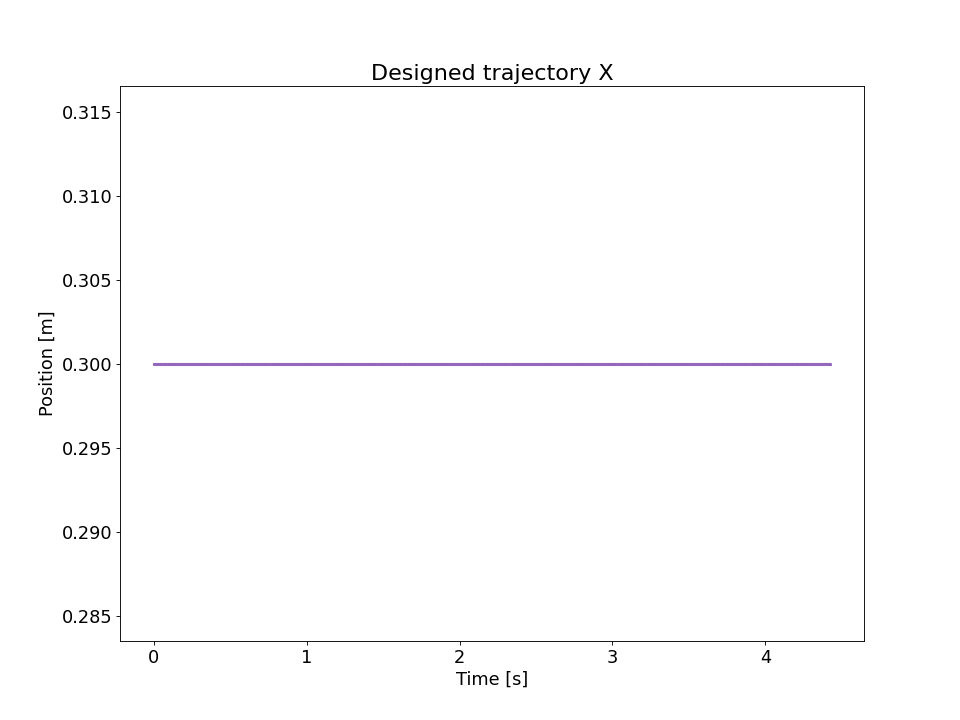

<IPython.core.display.Javascript object>


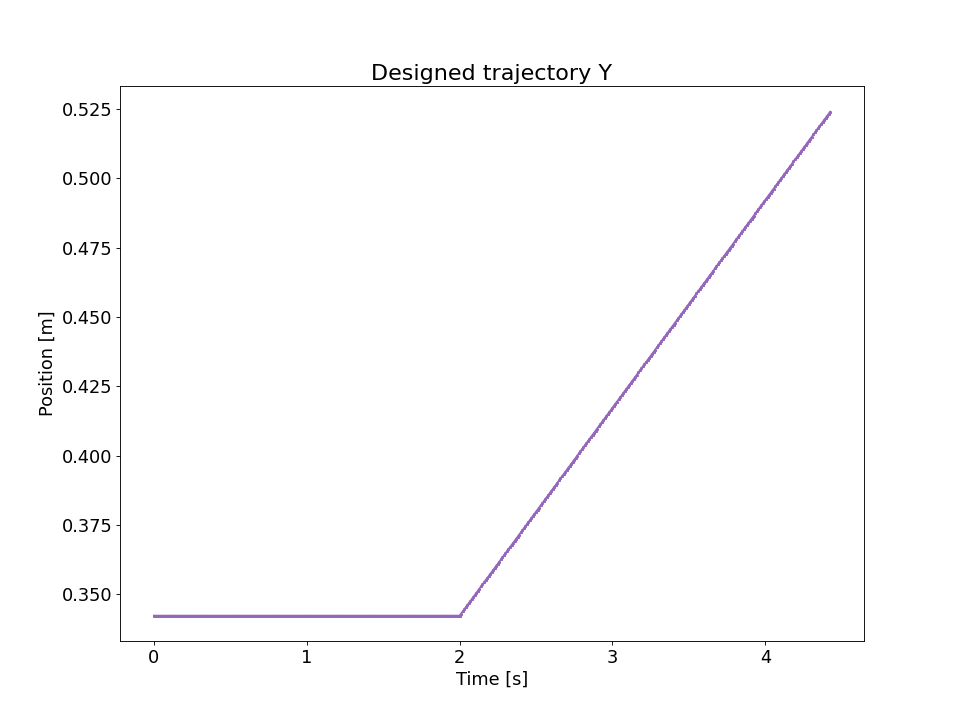

<IPython.core.display.Javascript object>


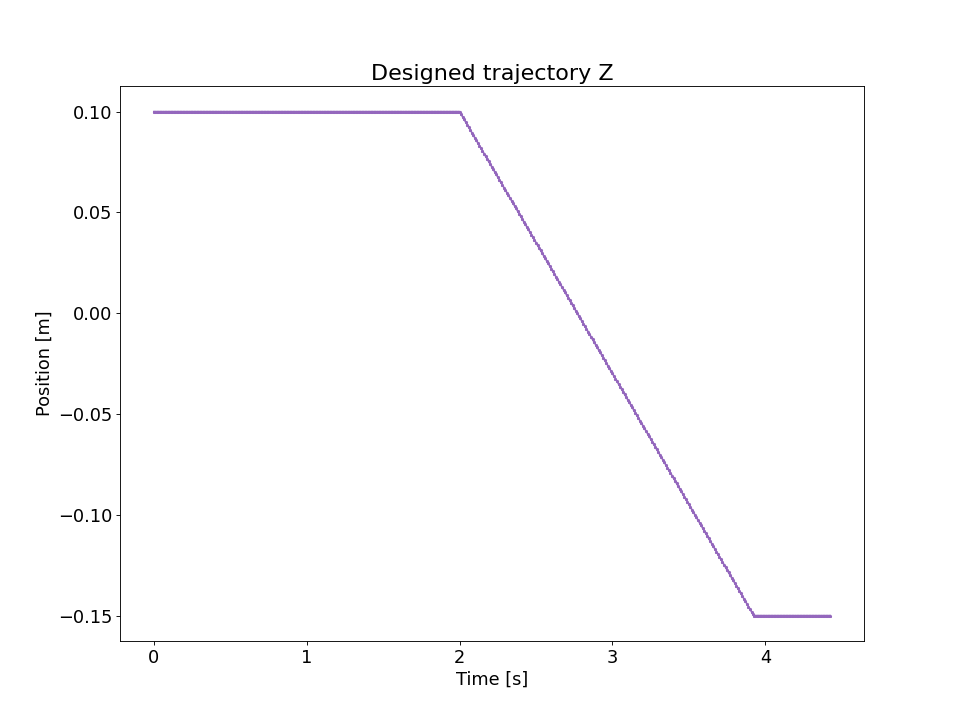

<IPython.core.display.Javascript object>


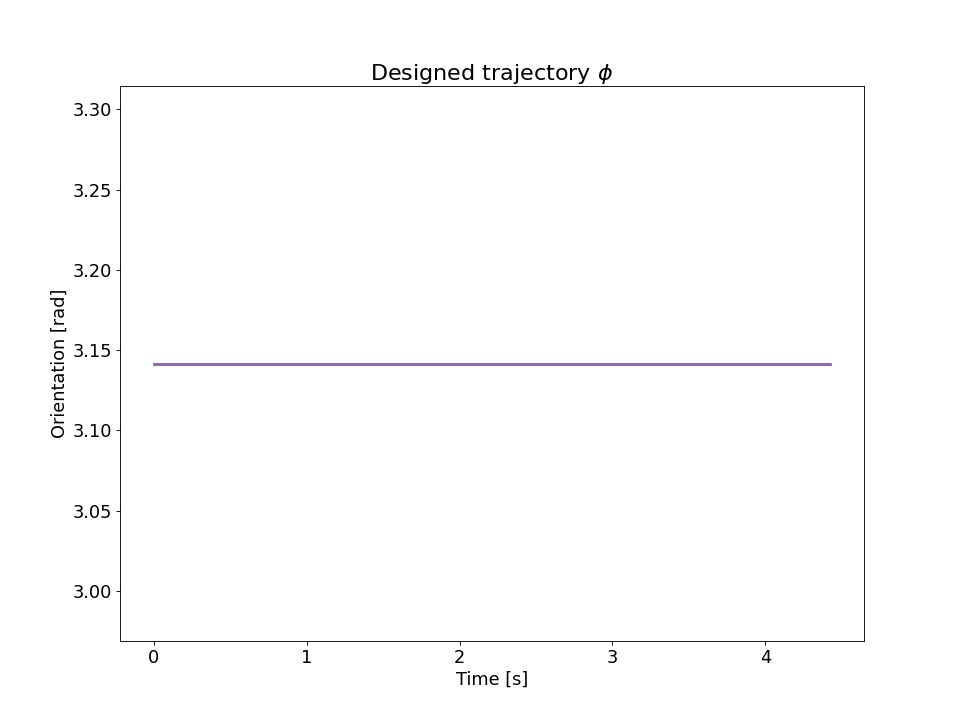

<IPython.core.display.Javascript object>


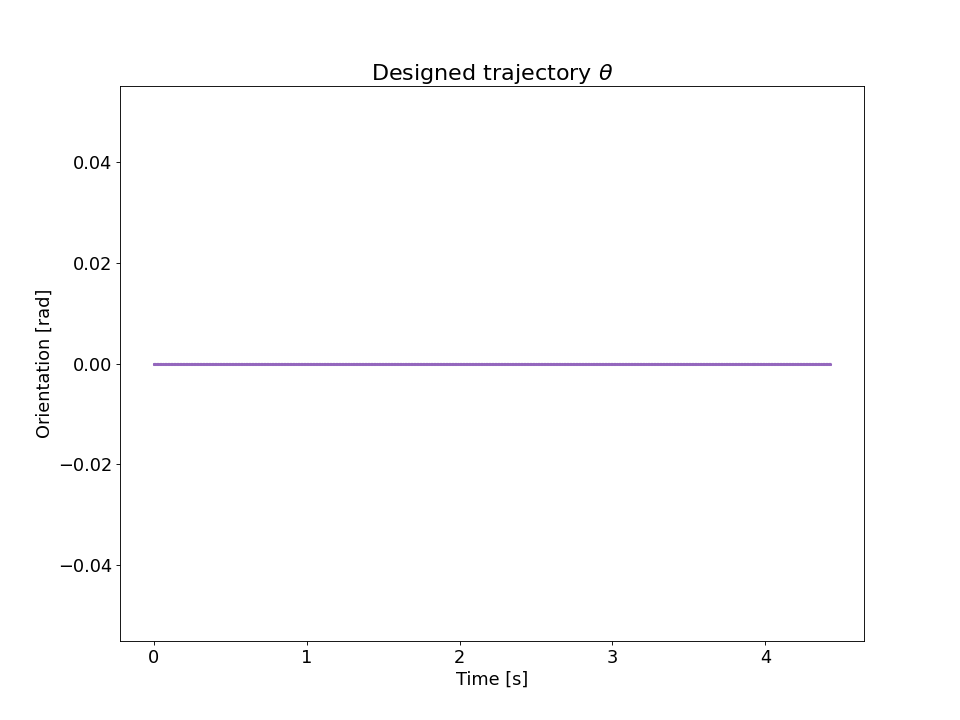

<IPython.core.display.Javascript object>


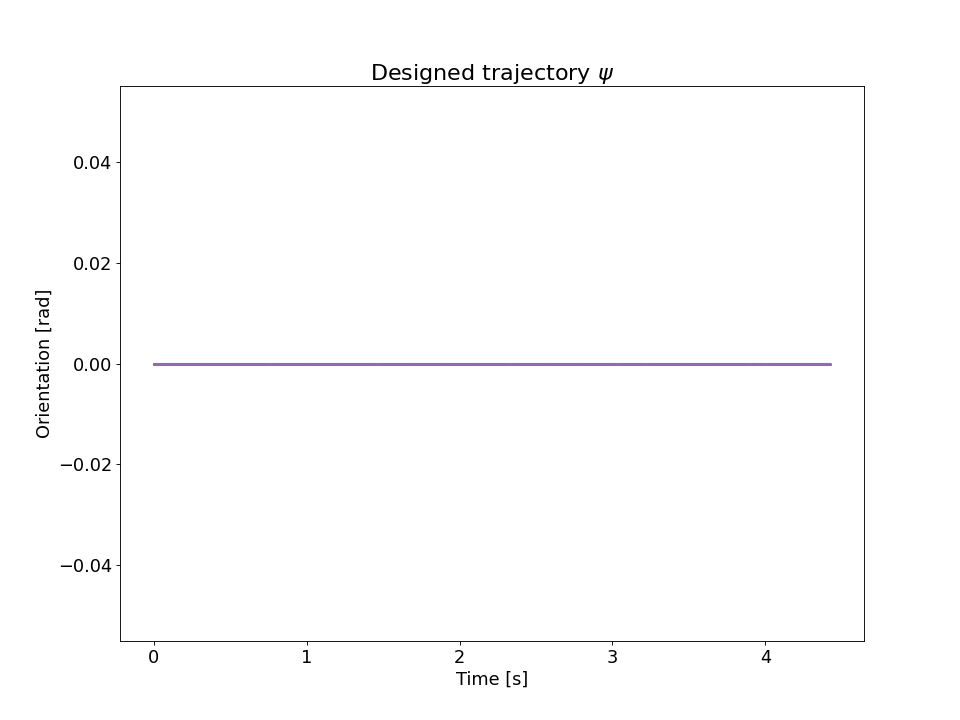

In [4]:
for j in range(6):
    data = trajectory.get_index(j)
    plt.figure(figsize=config.figsize,dpi=config.dpi)
    plt.rcParams['xtick.labelsize'] = config.fontsize2
    plt.rcParams['ytick.labelsize'] = config.fontsize2
    plt.plot(data.time, data.value,'C' + str(4) + '-*',linewidth=config.linewidth, markersize=config.markersize3)
#     plt.legend(fontsize=config.fontsize2)
    plt.xlabel('Time [s]',fontsize=config.fontsize2)
    if j < 3:
        plt.ylabel('Position [m]',fontsize=config.fontsize2)
    else:
        plt.ylabel('Orientation [rad]',fontsize=config.fontsize2)
    plt.title('Designed trajectory ' + config.variable_labels[j],fontsize=config.fontsize1)

<IPython.core.display.Javascript object>


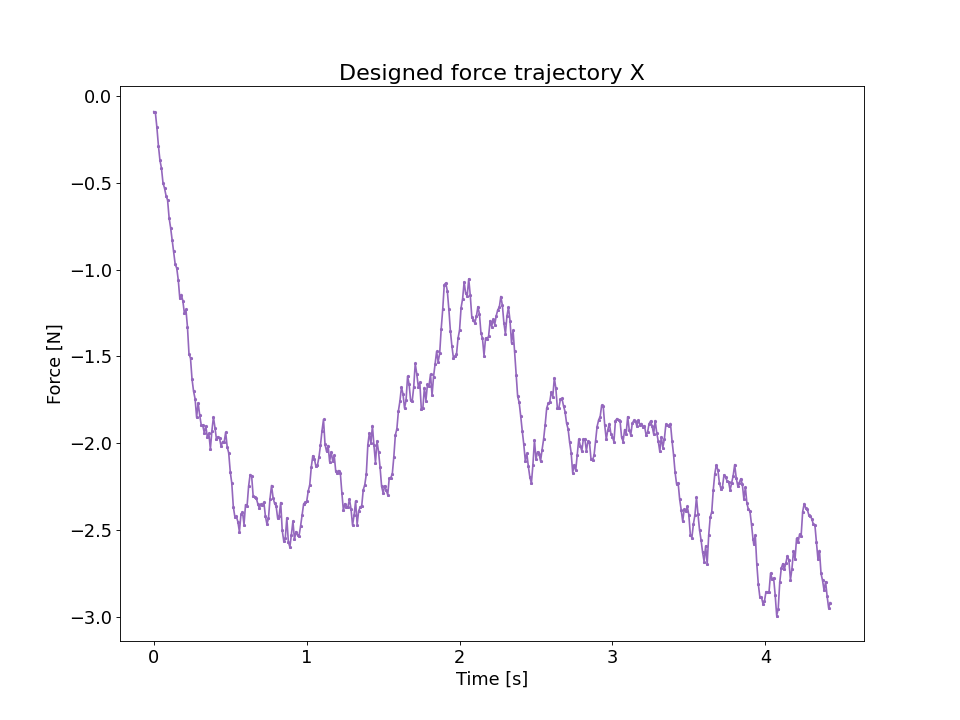

<IPython.core.display.Javascript object>


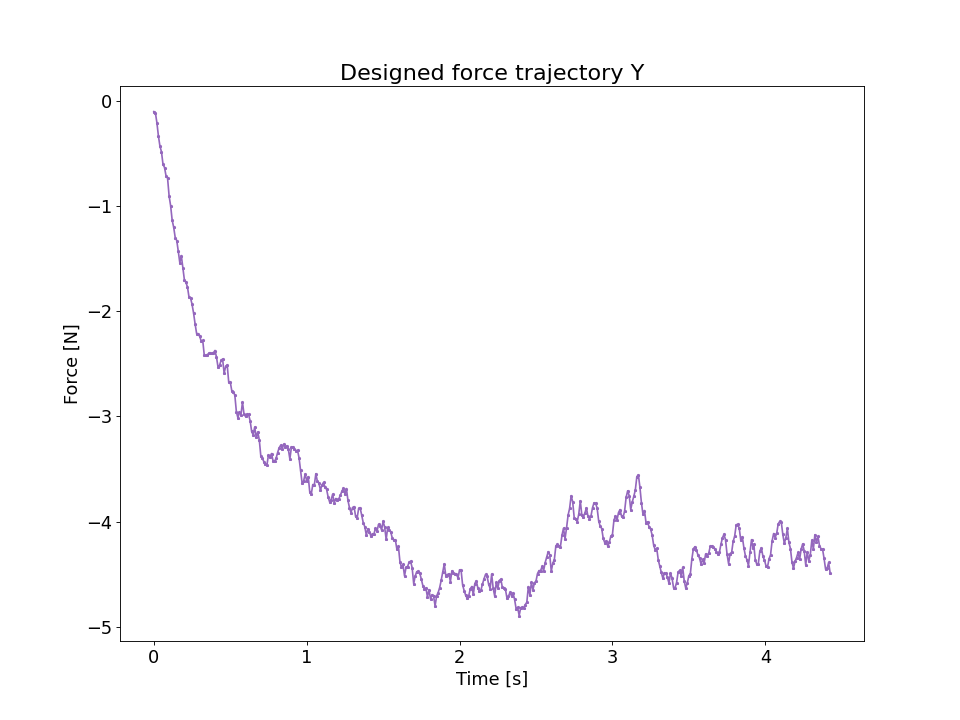

<IPython.core.display.Javascript object>


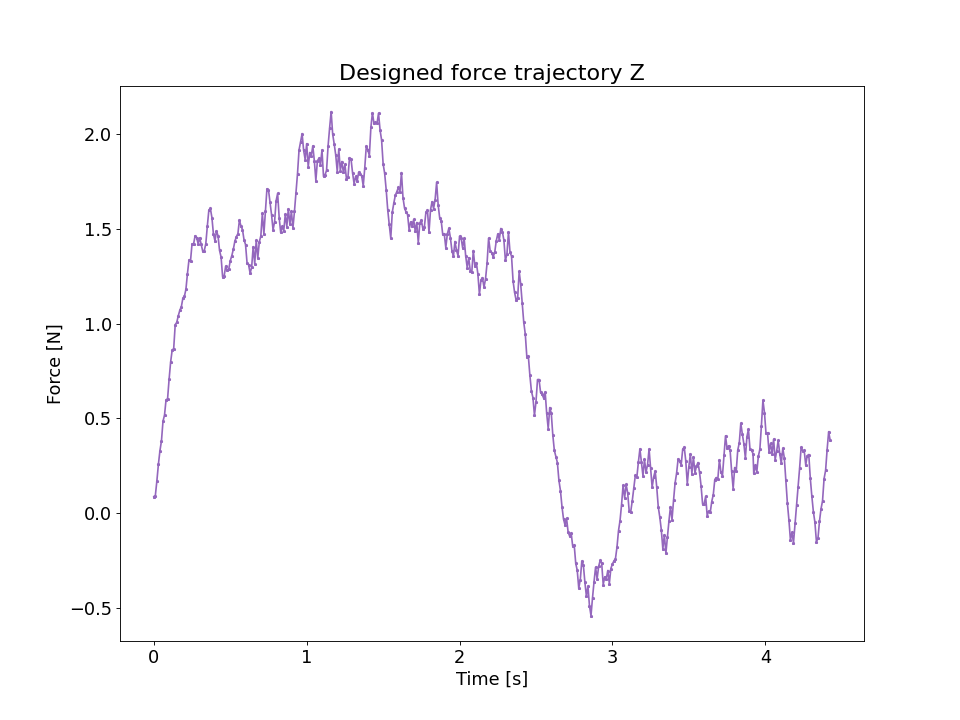

<IPython.core.display.Javascript object>


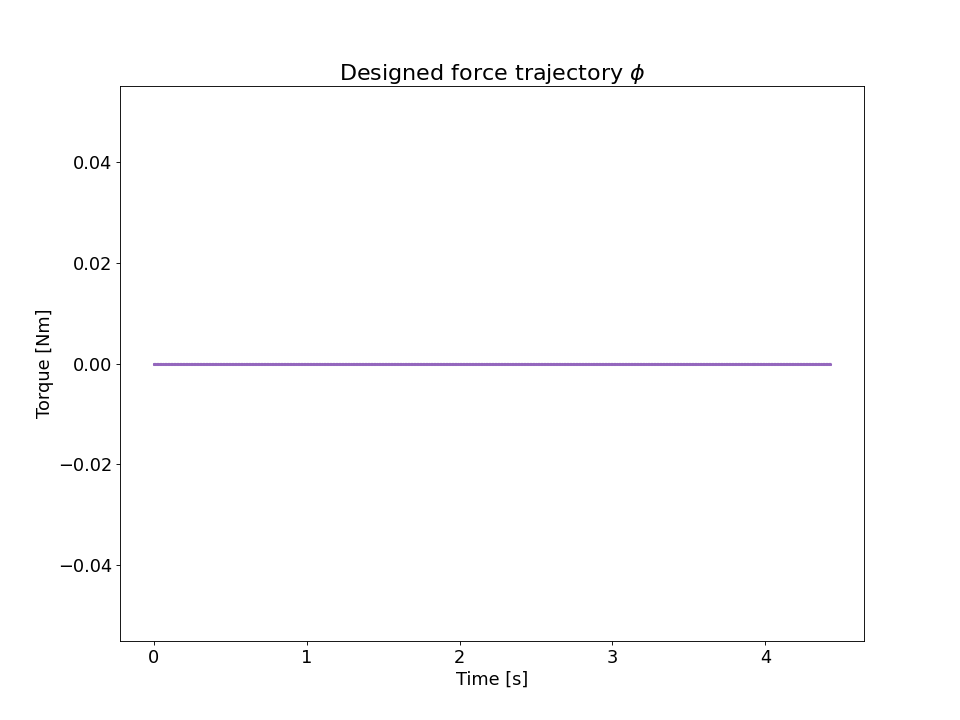

<IPython.core.display.Javascript object>


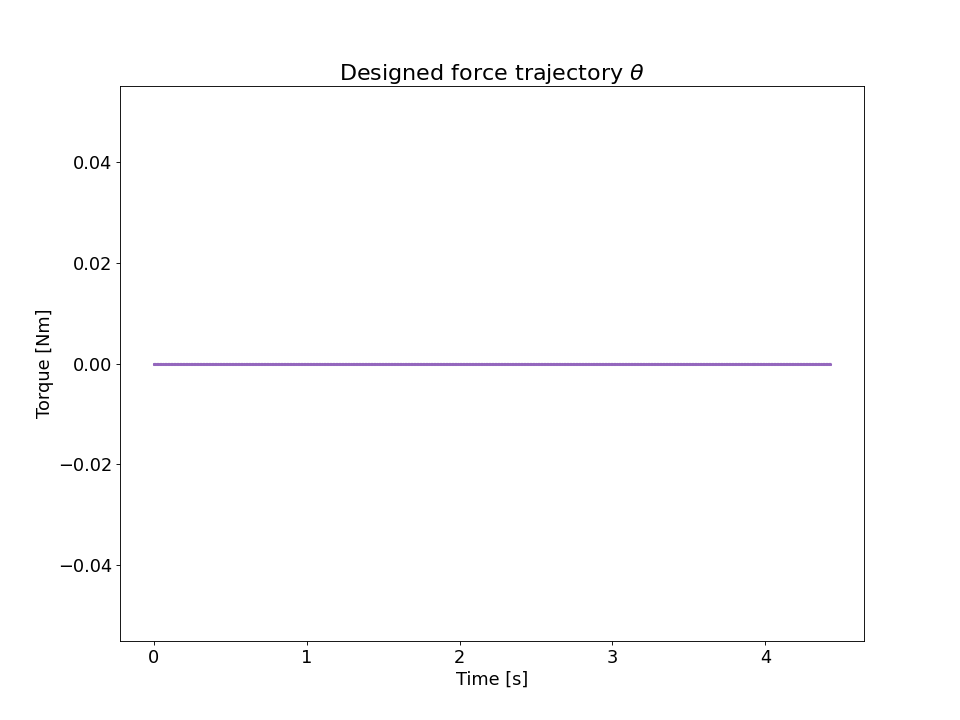

<IPython.core.display.Javascript object>


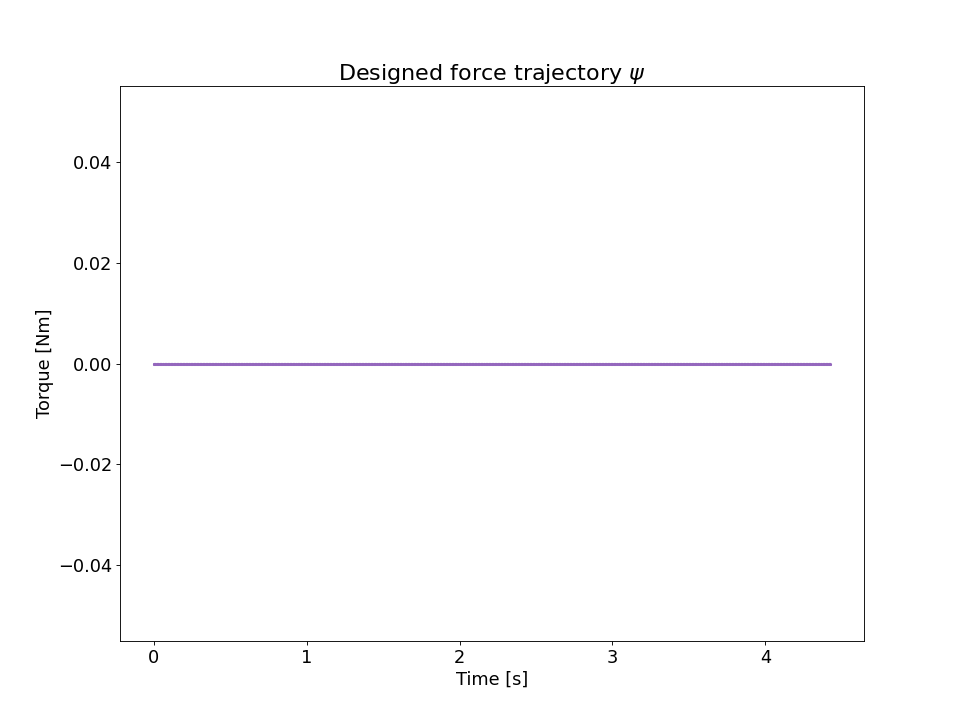

In [5]:
for j in range(6):
    data = force_trajectory.get_index(j)
    plt.figure(figsize=config.figsize,dpi=config.dpi)
    plt.rcParams['xtick.labelsize'] = config.fontsize2
    plt.rcParams['ytick.labelsize'] = config.fontsize2
    plt.plot(data.time, data.value,'C' + str(4) + '-*',linewidth=config.linewidth, markersize=config.markersize3)
#     plt.legend(fontsize=config.fontsize2)
    plt.xlabel('Time [s]',fontsize=config.fontsize2)
    if j < 3:
        plt.ylabel('Force [N]',fontsize=config.fontsize2)
    else:
        plt.ylabel('Torque [Nm]',fontsize=config.fontsize2)
    plt.title('Designed force trajectory ' + config.variable_labels[j],fontsize=config.fontsize1)

In [6]:
data = dict()
data['datapoints'] = []
data['force_datapoints'] = []
for datapoint in trajectory:
    datapoint_dict = dict()
    datapoint_dict['time'] = datapoint.time
    datapoint_dict['value'] = datapoint.value
    data['datapoints'].append(datapoint_dict)
for force_datapoint in force_trajectory:
    force_datapoint_dict = dict()
    force_datapoint_dict['time'] = force_datapoint.time
    force_datapoint_dict['value'] = force_datapoint.value
    data['force_datapoints'].append(force_datapoint_dict)

with open(config.designed_trajectory_output_file, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)
